In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
import openturns as ot
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
means = [[-3., 0.], [3., 0.], [0., 4.]]
mixture_sample = ot.Sample(0, 2)
n = 5000
for mean in means:
    mixture_sample.add(ot.Normal(mean, [0.8] * 2).getSample(n))

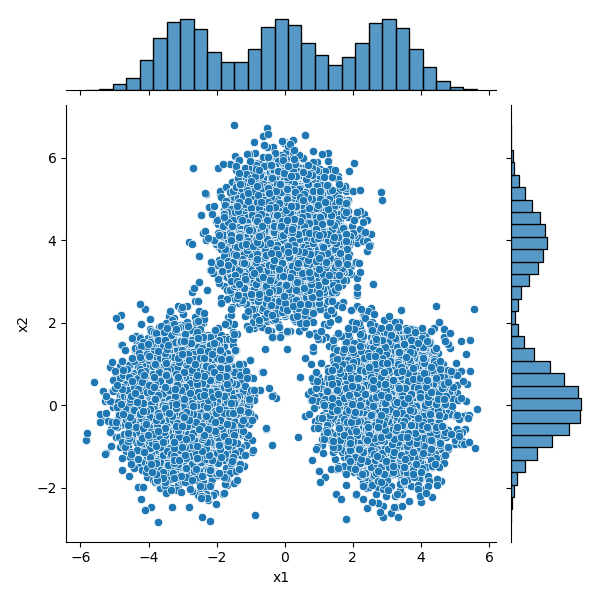

In [4]:
df = pd.DataFrame(np.array(mixture_sample), columns=['x1', 'x2'])
sns.jointplot(df, x='x1', y='x2');

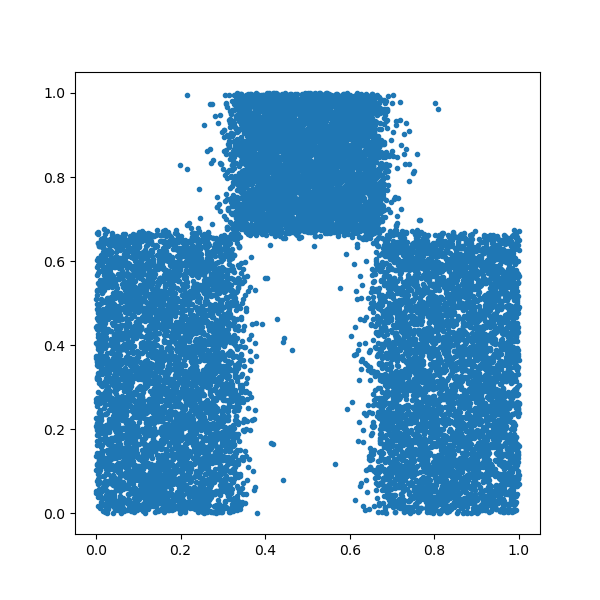

In [5]:
rdf = df.rank() / (3 * n)
plt.figure(figsize=(6, 6))
plt.scatter(rdf.loc[:, "x1"], rdf.loc[:, "x2"], marker='.')

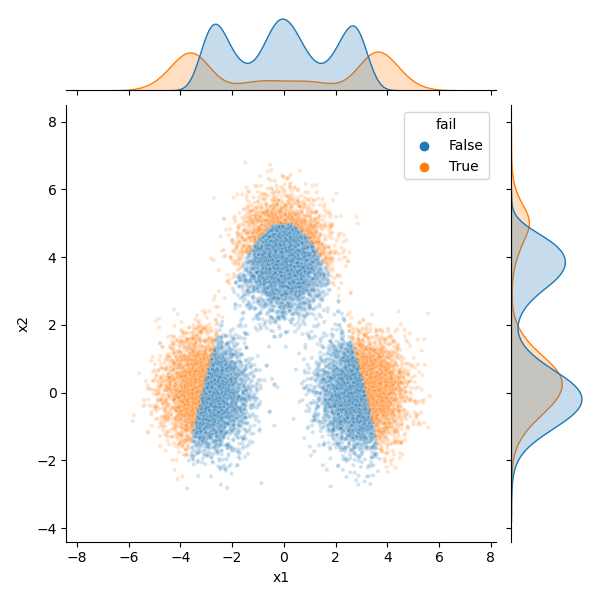

In [6]:
df['y'] = 4.0 - (df['x2']-1) - 0.5 * df['x1']**2
df['fail'] = df['y'] < 0
sns.jointplot(df, x='x1', y='x2', hue='fail', marker='.', alpha=0.2);

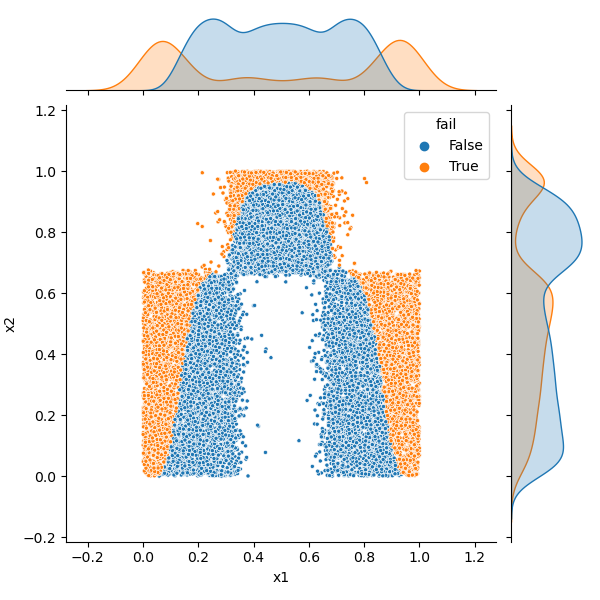

In [7]:
rdf['fail'] = df['fail']
sns.jointplot(rdf, x='x1', y='x2', hue='fail', marker='.');

In [8]:
failed_rsample = ot.Sample(rdf[rdf['fail']==1][['x1', 'x2']].values)
grid_size = 100
lowerbound = [0.0] * 2
upperbound = [1.0] * 2
mesher = ot.IntervalMesher([grid_size-1] * 2)
interval = ot.Interval(lowerbound, upperbound)
mesh = mesher.build(interval)
nodes = mesh.getVertices()
X0, X1 = np.array(nodes).T.reshape(2, grid_size, grid_size)

In [9]:
empirical_conditional_copula = np.array([[failed_rsample.computeEmpiricalCDF(n) for n in nodes]]).reshape(grid_size, grid_size)

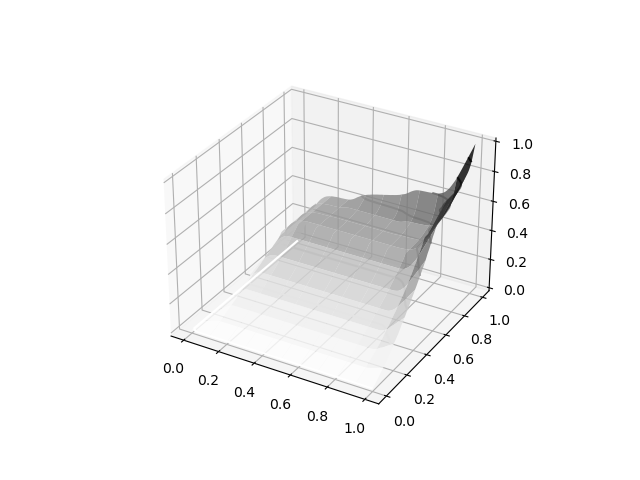

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X0, X1, empirical_conditional_copula, cmap='Greys', alpha=0.8, rstride=10)
ax.contour(X0, X1, empirical_conditional_copula, cmap='Greys');        

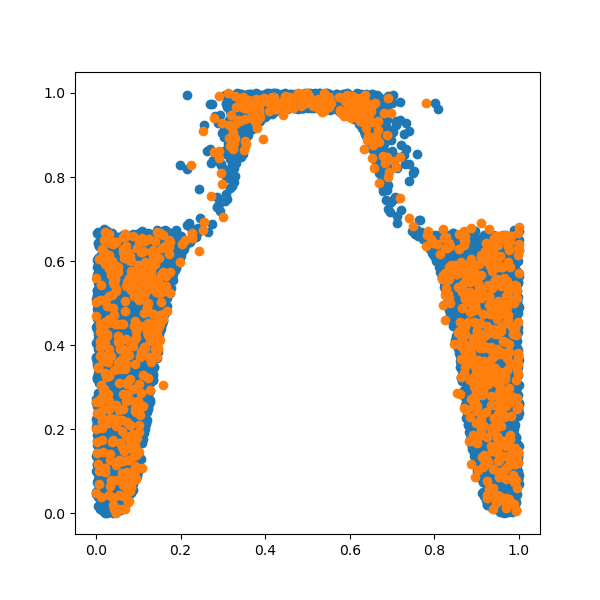

In [22]:
failed_copula = ot.EmpiricalBernsteinCopula(failed_rsample, 1000, True)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(6,6))
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1])
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1])